# GRIP: The Sparks Foundation

### Data Science and Business Analytics Intern

### Author: Aastha Shah

## Task 3: Exploratory Data Analysis - Retail
###  ->As a business manager, try to find out the weak areas where you can make more profit
###  ->What all business problems you can derive by exploring the data?

## Step 1:  Importing all necessary libraries 

In [80]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(shiny)
library(plotly)
library(corrr)
library(treemap)


## Step 2: Reading data from csv file 

In [81]:
superstore <- read.csv("C:\\Users\\ADMIN\\Downloads\\SampleSuperstore.csv")
head(superstore)
tail(superstore)

,Ship.Mode,Segment,Country,City,State,Postal.Code,Region,Category,Sub.Category,Sales,Quantity,Discount,Profit
,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
2,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
5,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694


,Ship.Mode,Segment,Country,City,State,Postal.Code,Region,Category,Sub.Category,Sales,Quantity,Discount,Profit
,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>
9989,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.100,5,0.0,55.6470
9990,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9993,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9994,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


##### We can clearly see that it is a dataframe of 9994 rows and 13 columns

## Step 3: Finding more information about dataset

In [82]:
summary(superstore)

          Ship.Mode           Segment              Country    
 First Class   :1538   Consumer   :5191   United States:9994  
 Same Day      : 543   Corporate  :3020                       
 Second Class  :1945   Home Office:1783                       
 Standard Class:5968                                          
                                                              
                                                              
                                                              
            City               State       Postal.Code        Region    
 New York City: 915   California  :2001   Min.   : 1040   Central:2323  
 Los Angeles  : 747   New York    :1128   1st Qu.:23223   East   :2848  
 Philadelphia : 537   Texas       : 985   Median :56431   South  :1620  
 San Francisco: 510   Pennsylvania: 587   Mean   :55190   West   :3203  
 Seattle      : 428   Washington  : 506   3rd Qu.:90008                 
 Houston      : 377   Illinois    : 492   Max.   :99301   

## Step 4: Data Preparing and Cleaning 

In [86]:
#To check if there are any null values
is.null(superstore)

[1] FALSE

In [87]:
#To check if there is any duplicacy and remove them too along with removing two columns (postal codes and country)
#as I do not require them for further analysis.
data <- superstore %>% 
         distinct() %>%
         select(-c(Country, Postal.Code))
data

Ship.Mode,Segment,City,State,Region,Category,Sub.Category,Sales,Quantity,Discount,Profit
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>
Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825


##### New data consists of 9977 rows and 11 columns.

# Step 5: Checking Statistical Relationship between rows and columns.

### 1) Correlation between variables.

In [88]:
x <- data %>%select(Sales, Quantity, Discount, Profit)
corr_var <- correlate(x, method = 'pearson',use = "pairwise.complete.obs", diagonal = 1)
corr_var


Correlation method: 'pearson'
Missing treated using: 'pairwise.complete.obs'




term,Sales,Quantity,Discount,Profit
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Sales,1.00000000,0.200722092,-0.028311117,0.47906731
Quantity,0.20072209,1.000000000,0.008678422,0.06621065
Discount,-0.02831112,0.008678422,1.000000000,-0.21966206
Profit,0.47906731,0.066210646,-0.219662064,1.00000000


### 2) Covariance between variables.

In [89]:
y<- data %>%select(Sales, Quantity, Discount, Profit)
cov_var <- cov(y)
cov_var

,Sales,Quantity,Discount,Profit
Sales,389028.396022,2.787656e+02,-3.645637429,70057.06713
Quantity,278.765576,4.958001e+00,0.003989513,34.56574
Discount,-3.645637,3.989513e-03,0.042623749,-10.63275
Profit,70057.067126,3.456574e+01,-10.632750986,54970.47882


### 3) Statistical Summary for sales

In [90]:
summary(data$Sales)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    0.444    17.300    54.816   230.149   209.970 22638.480 

## Step 6: Analysis and Visualization

### 1) Statewise Sales Analysis

State,total_sales
<fct>,<dbl>
California,457576.271
New York,310827.151
Texas,170124.542
Washington,138560.810
Pennsylvania,116496.362
Florida,89473.708
Illinois,80162.537
Ohio,77976.764
Michigan,75879.644


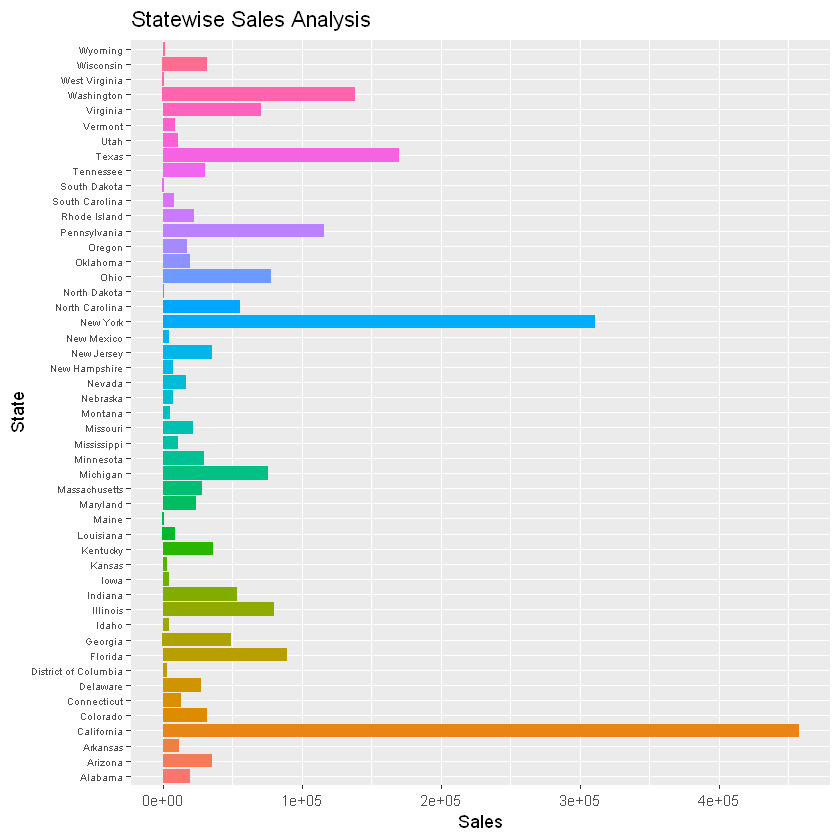

In [91]:
 statewise_sales <- data %>% 
                  group_by(State) %>%
                  summarise(total_sales = sum(Sales)) %>%
                  arrange(desc(total_sales))
statewise_sales

ggplot(data, aes( x= State, y= Sales, fill= State),options(scipen=999)) + 
          geom_col()+
          ggtitle("Statewise Sales Analysis") + 
          coord_flip() + 
        theme(legend.position = "None", axis.text.y = element_text(size=6))

##### Observation: State of California recorded the highest Sales of around 4,50,000 USD; followed by New York, Texas and Washington at second, third and fourth position respectively. On the other hand, North Dakota records the least sales among all the states with nearly 900 USD.

### 2) Regionwise Sales Analysis

Region,totalS
<fct>,<dbl>
West,725255.6
East,678435.2
Central,500782.9
South,391721.9


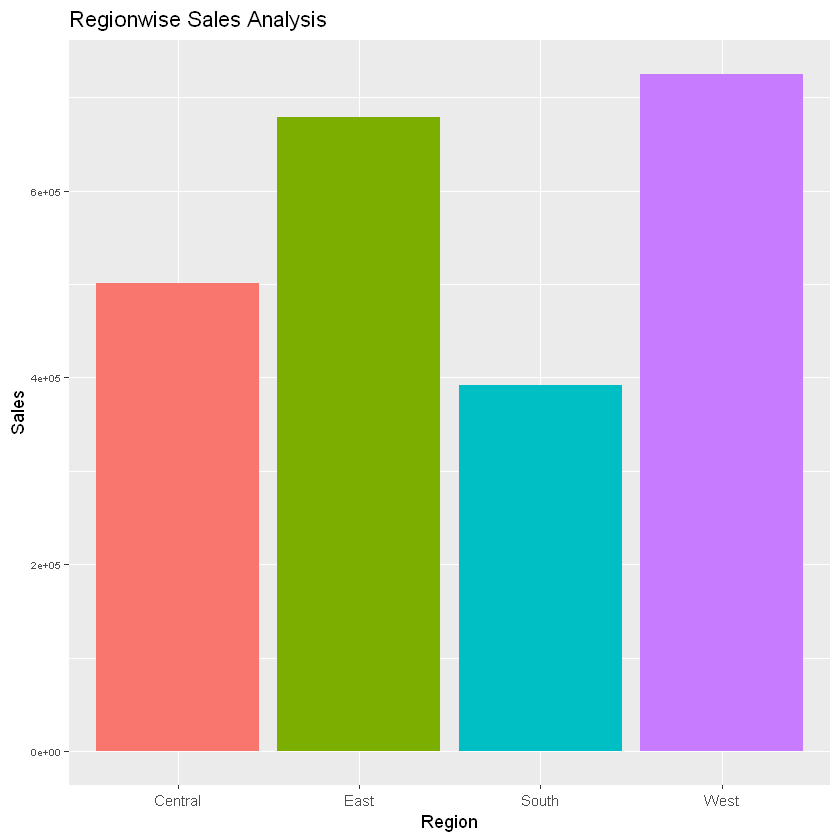

In [92]:
regionwise_sales = data %>% 
        group_by(Region) %>%
       summarize(totalS= sum(Sales)) %>%
       arrange(desc(totalS))
regionwise_sales

ggplot(data, aes( x= Region, y= Sales, fill= Region),options(scipen=99)) + 
          geom_col()+
          ggtitle("Regionwise Sales Analysis") + 
        theme(legend.position = "None", axis.text.y = element_text(size=6))

##### Observation : From Regionwise Sales chart, we can see that company's sales are mostly concentrated on the Eastern and Western Region of America

### 3) Statewise Profit Analysis

State,totalP
<fct>,<dbl>
California,76330.7891
New York,74015.4622
Washington,33368.2375
Michigan,24428.0903
Virginia,18597.9504
Indiana,18382.9363
Georgia,16250.0433
Kentucky,11199.6966
Minnesota,10823.1874


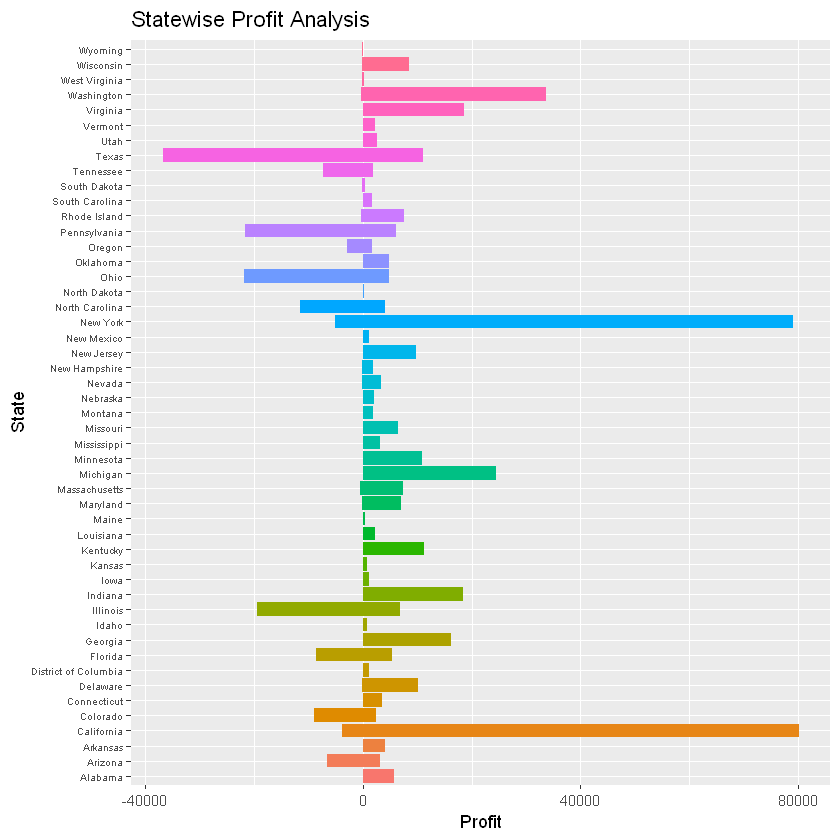

In [93]:
Statewise_profit = data%>% 
          group_by(State)%>% 
          summarise(totalP= sum(Profit))%>% 
           arrange(desc(totalP))
Statewise_profit

ggplot(data, aes( x= State, y= Profit, fill= State),options(scipen=99)) + 
          geom_col()+
          ggtitle("Statewise Profit Analysis") + 
          coord_flip() +
          theme(legend.position = "None", axis.text.y = element_text(size=6))

##### Observation :  From Statewise Profit Analysis , California and New York recorded the most profits. Texas was the most unprofitable among all, causing the company severe losses.

### 4)Regionwise Profit Analysis

Region,totalS
<fct>,<dbl>
West,725255.6
East,678435.2
Central,500782.9
South,391721.9


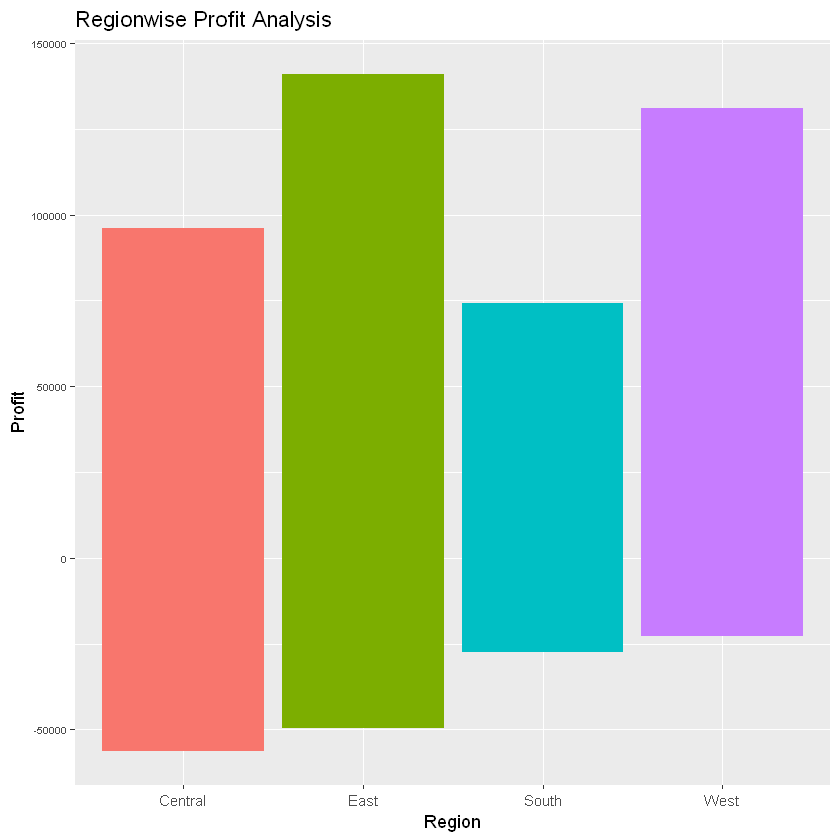

In [94]:
regionwise_profit = data %>% 
        group_by(Region) %>%
       summarize(totalP= sum(Profit)) %>%
       arrange(desc(totalP))
regionwise_sales

ggplot(data, aes( x= Region, y= Profit, fill= Region),options(scipen=99)) + 
          geom_col()+
          ggtitle("Regionwise Profit Analysis") + 
        theme(legend.position = "None", axis.text.y = element_text(size=6))

### 5) Statewise Profit-Sales Ratio Analysis
#### (To measure how much profits are produced at a certain level of sales.)

State,sales_profit_ratio
<fct>,<dbl>
District of Columbia,0.36983662
Delaware,0.36346034
Minnesota,0.36242618
Maine,0.35771387
Arkansas,0.34326447
Indiana,0.34325110
Georgia,0.33098615
Montana,0.32800377
Rhode Island,0.32197470


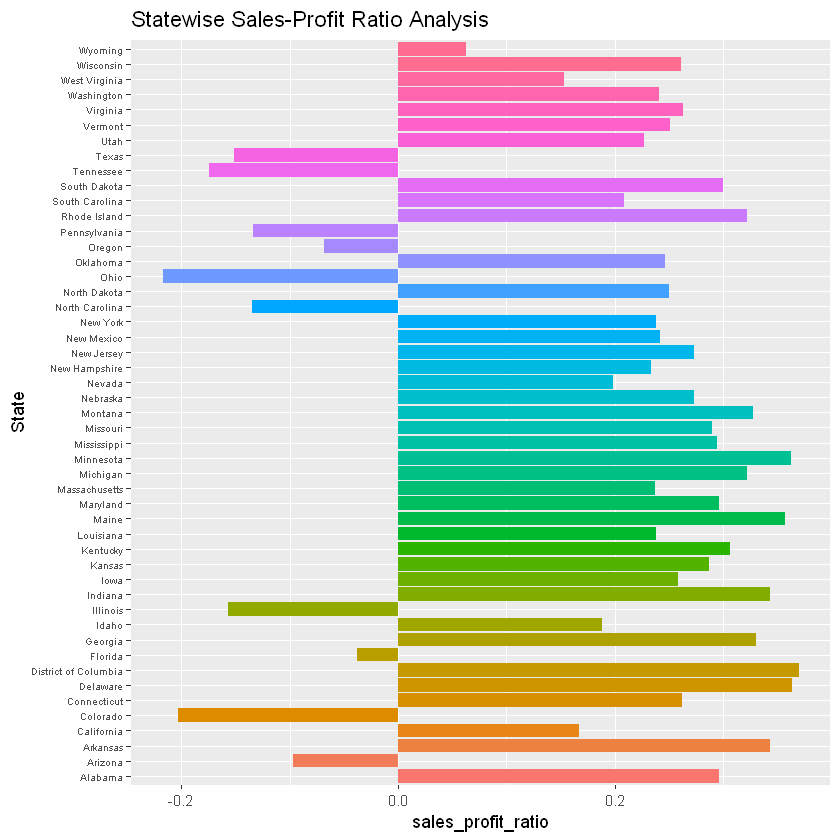

In [95]:
BarPlot = data %>% 
        group_by(State) %>%
       summarize(sales_profit_ratio= sum(Profit)/sum(Sales)) %>%
       arrange(desc(sales_profit_ratio))
BarPlot

ggplot(BarPlot, aes( x= sales_profit_ratio, y= State, fill= State),options(scipen=99)) + 
          geom_col()+
          ggtitle("Statewise Sales-Profit Ratio Analysis ") + 
        theme(legend.position = "None", axis.text.y = element_text(size=6))

##### Observations :                                                                                      1) Ohio has the worst profit-sales ratio(-0.2168).                                       2) The company should improve their Profit-Sales ratio in California, New York and Washington because even though these states have highest profits, the profit-sales ratio is not very impressive.
             

### 6) Segmentwise Sales and Profit Analysis

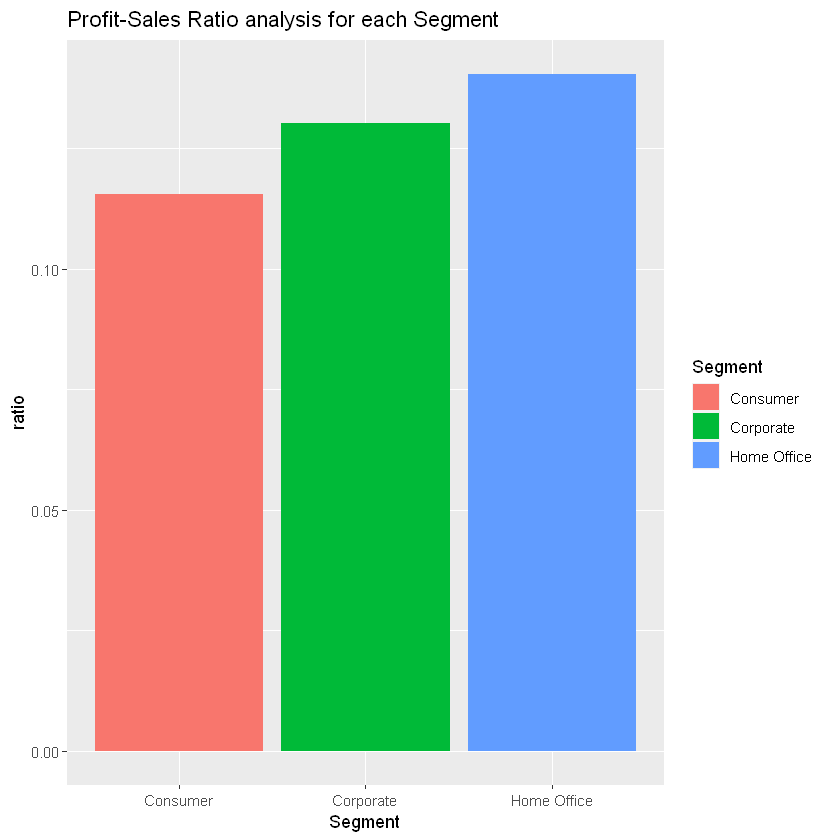

In [96]:
Segment_analysis = data %>% 
        group_by(Segment) %>%
        summarize(ratio= sum(Profit)/sum(Sales)) %>%
        arrange(desc(ratio)) %>%
        ggplot( aes( x= Segment, y= ratio, fill= Segment),options(scipen=99)) + 
        geom_col()+
        ggtitle("Profit-Sales Ratio analysis for each Segment ")
Segment_analysis

##### Observations: The profit-sales ratio is highest for Home Office segment. The company can improve its Profit-Sales ratio in the Consumer and Corporate Segment.

### 7)  Percentage sales by Category. 

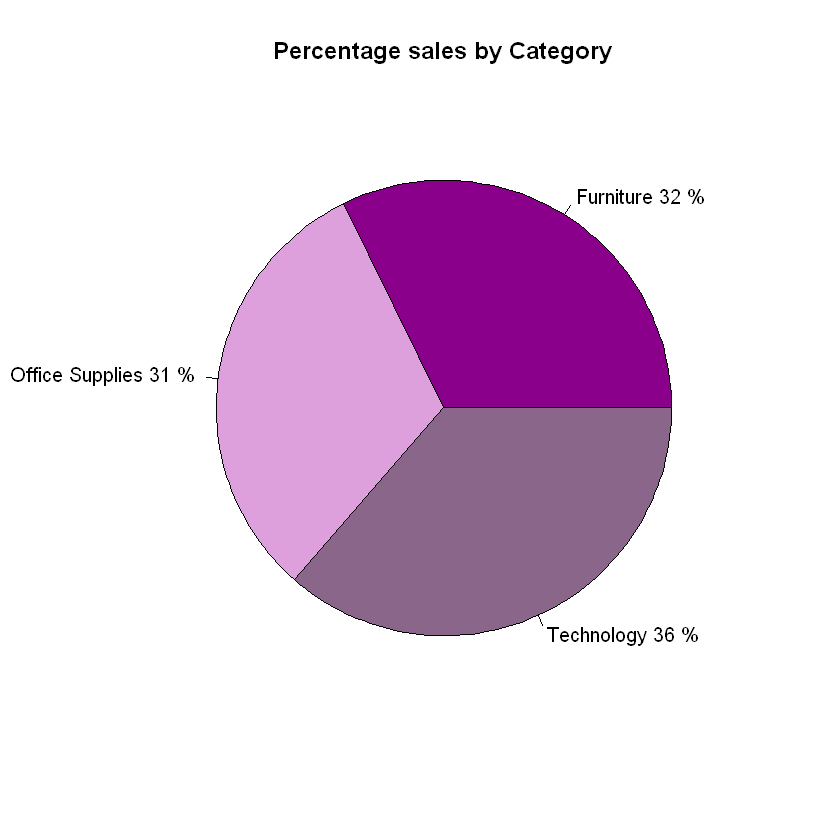

In [97]:
category_s = data %>% 
                  group_by(Category) %>%
                  summarize(Sales=sum(Sales))
pct <- round((category_s$Sales/sum(category_s$Sales))*100)
lbls <- paste(category_s$Category , pct)
lbls <- paste(lbls, "%", sep = " ")
pie(category_s$Sales, labels = lbls, main =" Percentage sales by Category ", col= c('darkmagenta','plum','plum4'))

### 8) Overall sales for Category ans Sub-Category


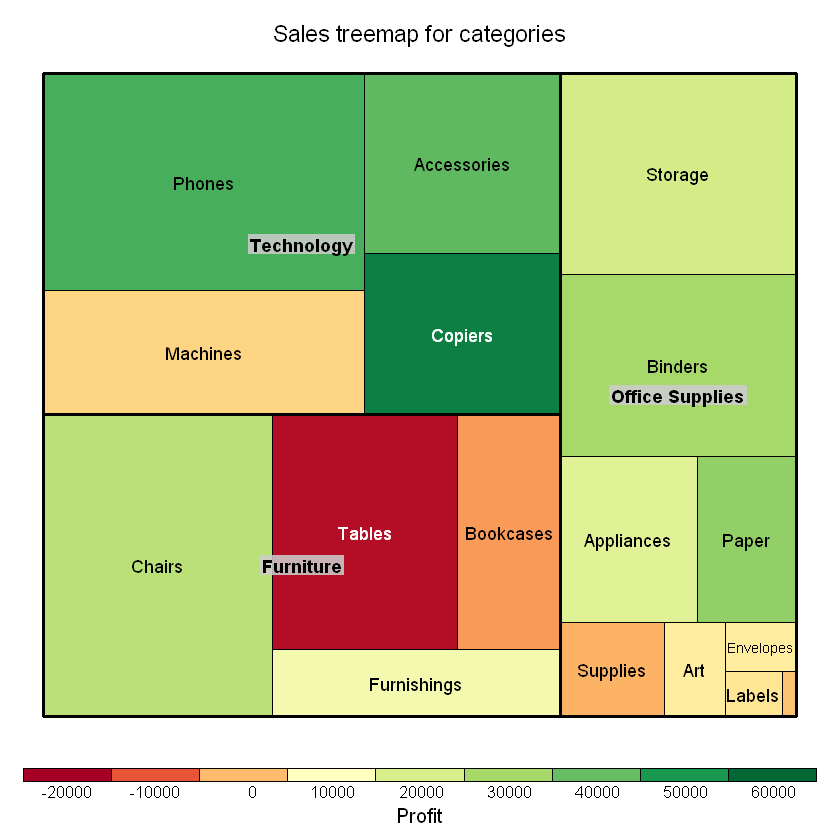

In [98]:
treemap(data, index = c("Category","Sub.Category"),title='Sales treemap for categories', vSize = "Sales",vColor ="Profit", type= "value",palette = "RdYlGn", range=c(-20000,60000),mapping= c(-20000,10000,60000))

##### Observation : The above Treemap provides information about the sales and profit of various product category and sub-category. The cell size in the treemap is decided by the sales and the colour gradient describes profit. It can be concluded that "Phones" under "Technology" has the highest sale. "Tables" under "Furniture" incurred highest loss, while "Copiers" under "Technology" was most profitable.

### 9) Price per Product in different Sub-Categories 

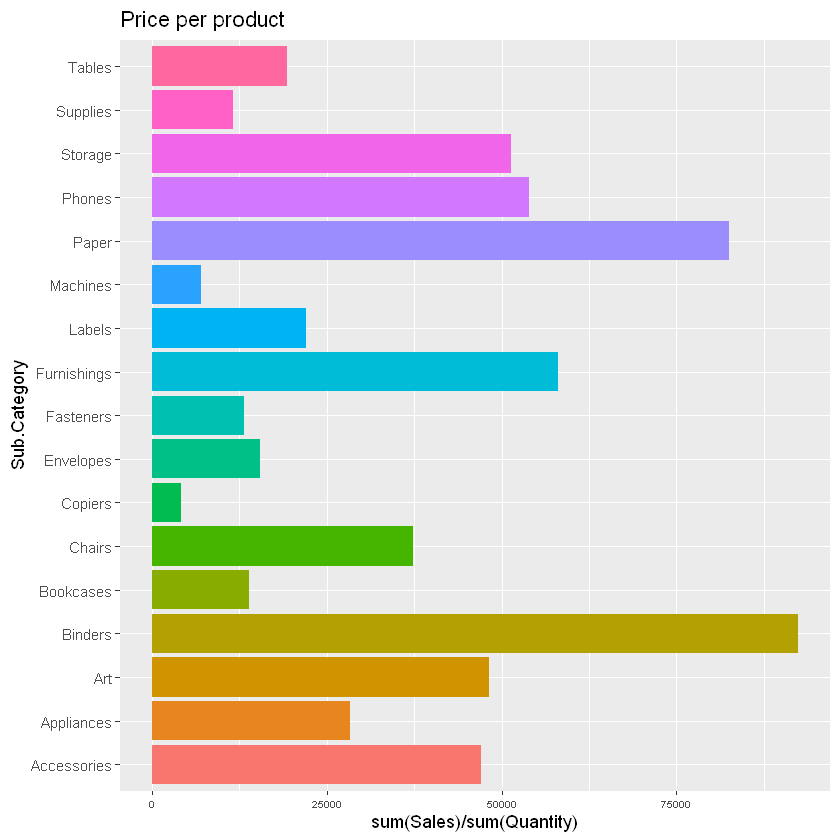

In [99]:
Price_per_product = ggplot(data, aes( x= Sub.Category, y=sum(Sales)/sum(Quantity), fill= Sub.Category),options(scipen=99)) + 
          geom_col()+
          ggtitle("Price per product") + 
          coord_flip() + 
        theme(legend.position = "None", axis.text.x = element_text(size=6))
Price_per_product

##### Observation : Binders have the highest price, followed by paper. Copiers had the least price among all.

### 10) Profit per product in different Sub-Category 

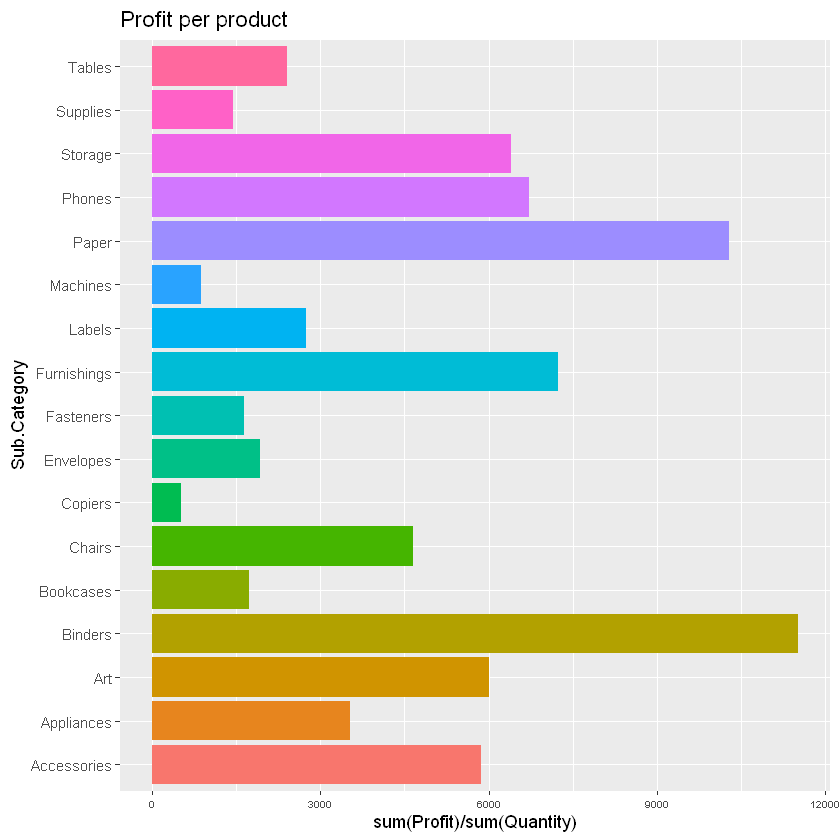

In [100]:
profit_per_product = ggplot(data, aes( x= Sub.Category, y=sum(Profit)/sum(Quantity), fill= Sub.Category),options(scipen=99)) + 
          geom_col()+
          ggtitle("Profit per product") +  
          coord_flip()+
        theme(legend.position = "None", axis.text.x = element_text(size=6))
profit_per_product

##### Observation : Binders make highest profit per product. 

### 11) Sales vs Quantity 

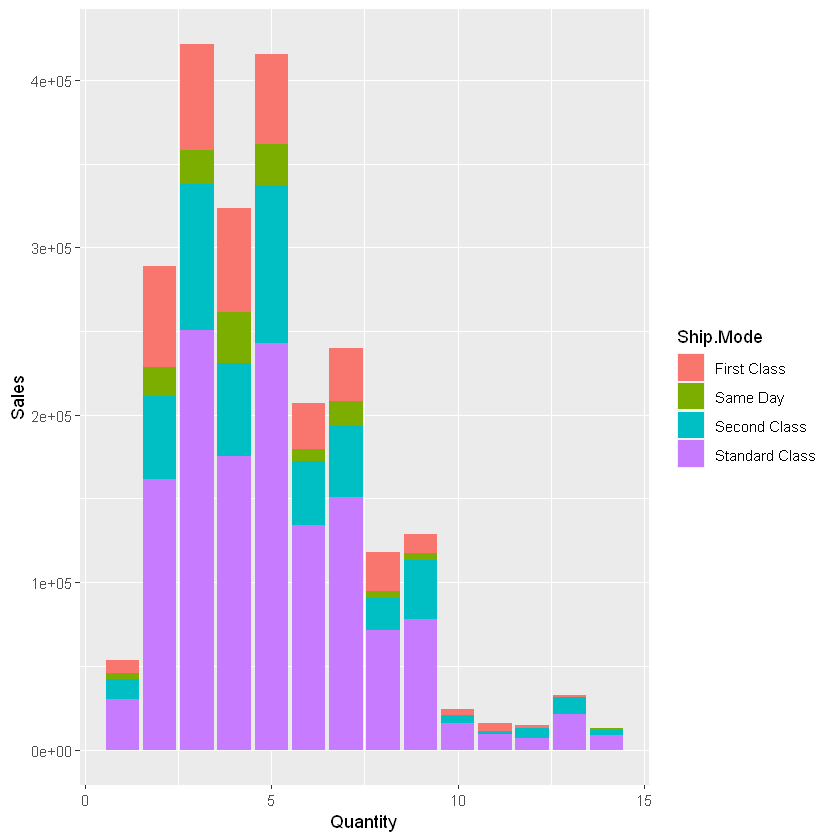

In [101]:
ggplot(data, aes(x = Quantity, y = Sales, fill = Ship.Mode),options(scipen=99) )+ geom_bar(stat = "identity")

##### Observation : We see the following pattern that most of the sales have been triggered by the standard class of shipment mode. 

### 12) Profit by Shipment mode and Segment

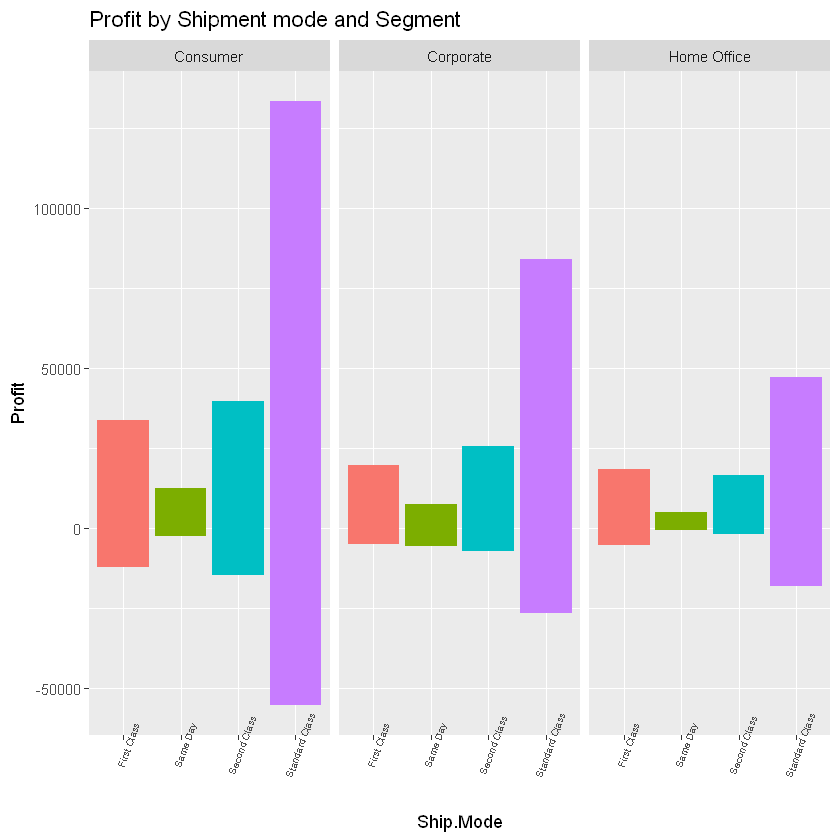

In [102]:
ggplot(data, aes( x=Ship.Mode, y= Profit, fill= Ship.Mode),options(scipen=99)) + 
          geom_col()+
          ggtitle("Profit by Shipment mode and Segment") + 
        theme(legend.position = "None", axis.text.x = element_text(angle = 70 ,size=6)) +
         facet_wrap(~Segment)

##### Observations : Standard Class is the most used shipping mode and Consumer segment is the largest segment among the three. 

### 13) Sales with and without Discount

In [103]:
Sales_with_discount = data %>%
                      filter(Discount != 0) %>%
                      summarize(totals=sum(Sales))
Sales_with_discount

Sales_without_discount = data %>%
                      filter(Discount == 0) %>%
                      summarize(totals=sum(Sales))
Sales_without_discount

totals
<dbl>
1208918


totals
<dbl>
1087278


##### Observation : Sales are high when discount is offered.

### 14) Profit with and without discount

In [104]:
profit_with_discount = data %>%
                      filter(Discount != 0) %>%
                      summarize(totalp=sum(Profit))
profit_with_discount

profit_without_discount = data %>%
                      filter(Discount == 0) %>%
                      summarize(totalp=sum(Profit))
profit_without_discount

totalp
<dbl>
-34602.98


totalp
<dbl>
320844.4


##### The company incurres loss when discount is given. So that area should be monitored.